In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plots

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [31]:
# try with different alpha

def td_prediction(policy, env, num_episodes, alpha=1.0, discount_factor=1.0):
    """
    Temporal Difference (TD(0)) prediction algorithm. Calculates the value function
    for a given policy using sampling with online update of value function.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for episode in range(num_episodes):
        state = env.reset()
        for t in range(1000):
            # sample action from the policy
            action = policy(state)
            
            # environments' effects after taking action
            next_state, reward, done, _ = env.step(action)
            
            
            td_error = reward + (discount_factor * V[next_state]) - V[state]
                
            # online update value function
            V[state] = V[state] + alpha * td_error
            if done:
                break
                
            state = next_state

    return V

In [32]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1


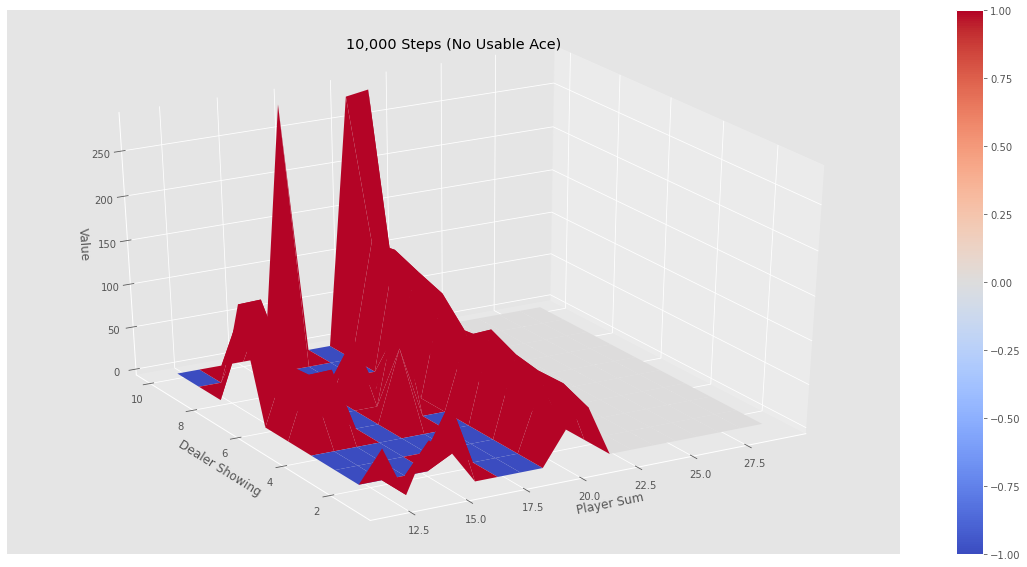

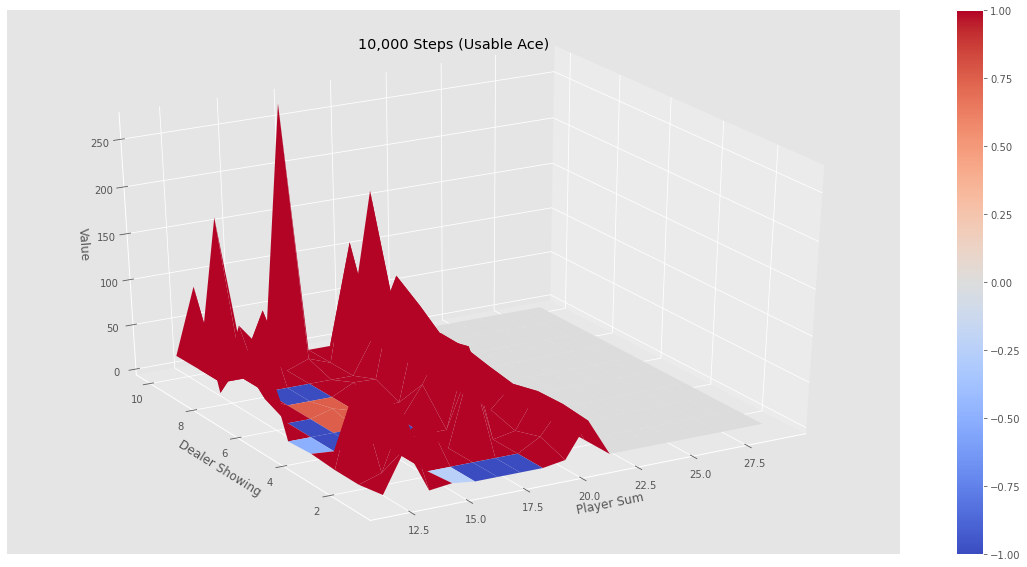

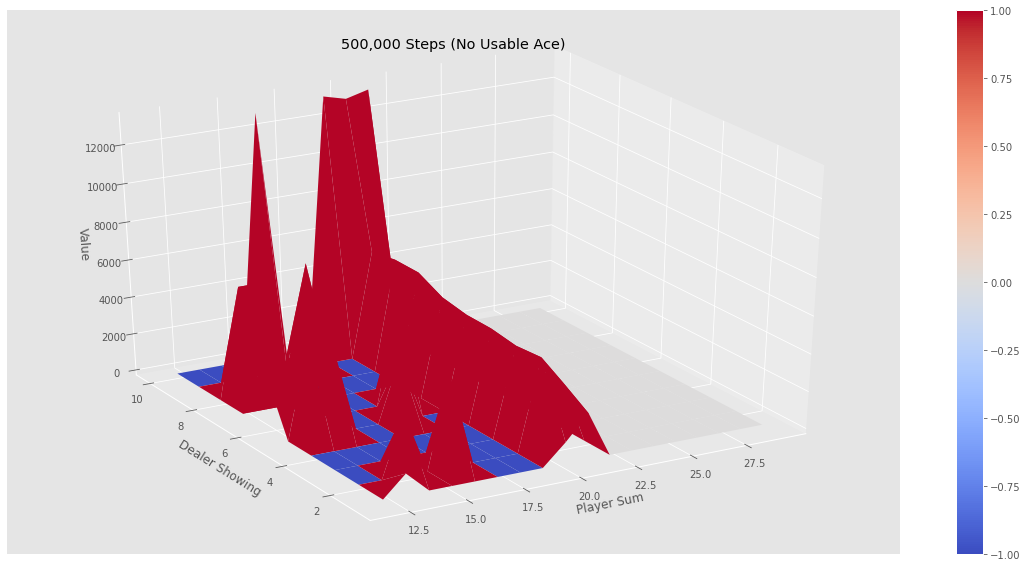

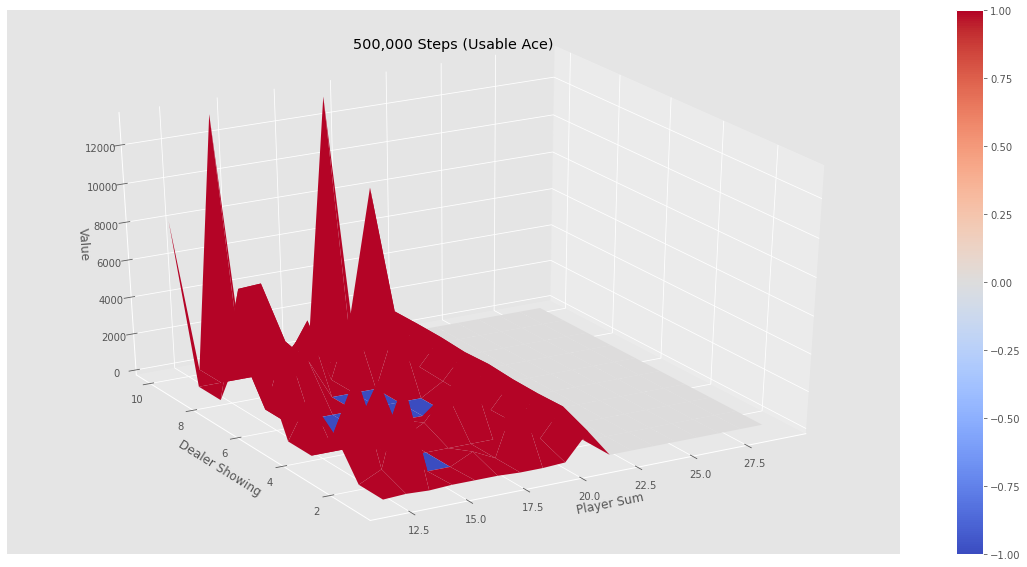

In [33]:
V_10k = td_prediction(sample_policy, env, num_episodes=10000)
plots.plot_value_function(V_10k, title="10,000 Steps")

V_500k = td_prediction(sample_policy, env, num_episodes=500000)
plots.plot_value_function(V_500k, title="500,000 Steps")

In [22]:
# try with different alpha

def batch_td_prediction(policy, env, num_episodes, alpha=0.01, discount_factor=1.0):
    """
    Temporal Difference (TD(0)) prediction algorithm. Calculates the value function
    for a given policy using sampling with online update of value function.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """
    
    # The final value function
    V = defaultdict(float)
    all_episodes = []
    # Implement this!
    for episode in range(num_episodes):
        state = env.reset()
        episode_trajectory = []
        for t in range(100):
            # sample action from the policy
            action = policy(state)
            
            # environments' effects after taking action
            next_state, reward, done, _ = env.step(action)
                
            # online update value function
#             V[state] = V[state] + alpha * td_error
            episode_trajectory.append((state, action, reward))
            if done:
                episode_trajectory.append((next_state, None, None))
                break
                
            state = next_state
        all_episodes.append(episode_trajectory)
        iteration = 0
        while iteration < 1000:
            increments = defaultdict(float)
            for episode_ in all_episodes:
                for i in range(0, len(episode_) - 1):
                    increments[episode_[i][0]] += episode_[i][2] + V[episode_[i+1][0]] - V[episode_[i][0]]
            s = 0
            for k, v in increments.items():
                increments[k] *= alpha
                s += increments[k]
            
            if s < 0.001:
                break
            
            # perform batch update
            for k, v in increments.items():
                V[k] += v
            iteration += 1
    return V

In [29]:
V = batch_td_prediction(sample_policy, env, num_episodes=1)
V

defaultdict(float,
            {(21, 10, False): 9.999999999999831,
             (17, 10, False): 9.000043171247261})

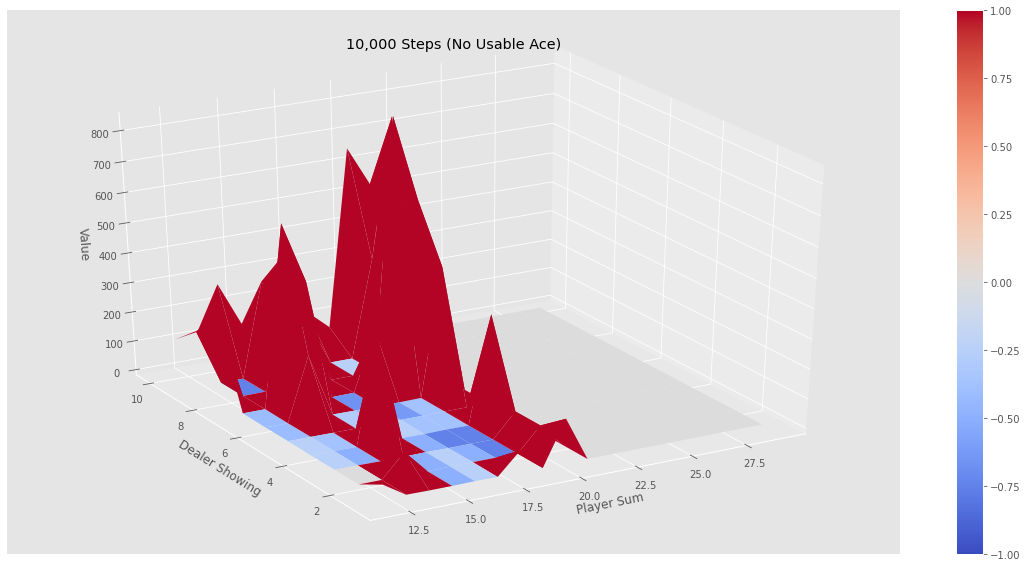

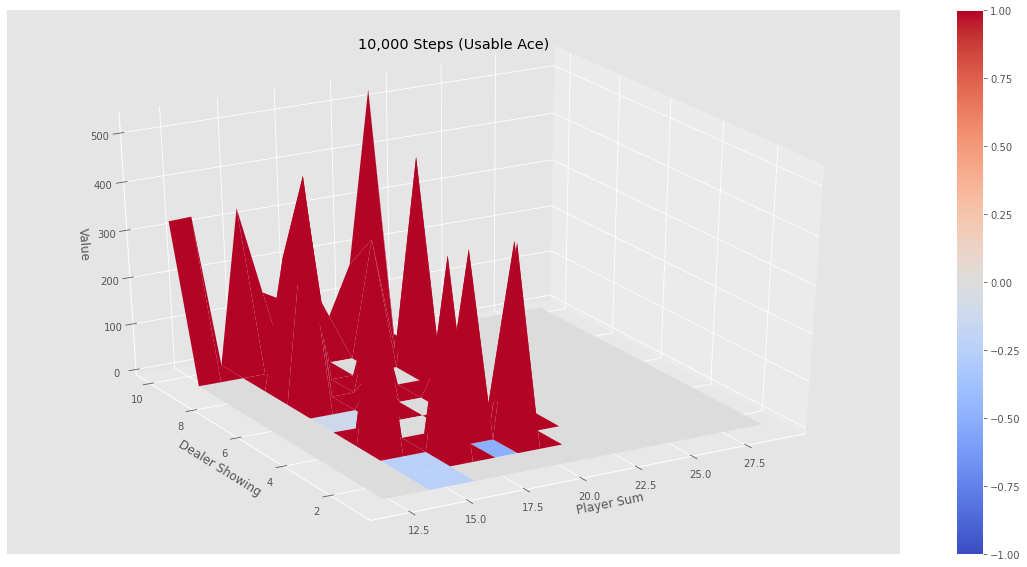

defaultdict(<class 'float'>, {(20, 3, False): 80.04000000000404, (17, 8, False): -0.9999999999999973, (12, 8, False): 279.0399999998529, (27, 8, False): 0.0, (20, 10, True): 170.03999999999033, (16, 10, True): 142.26245631143183, (21, 8, True): 440.0399999997448, (16, 8, True): 439.03999999974496, (20, 6, False): 430.0399999997539, (14, 6, False): 214.43666666654454, (24, 10, False): 0.0, (18, 10, False): 131.59249999991573, (21, 9, False): 790.1199999995671, (17, 9, False): 157.1039999999137, (20, 3, True): 400.0399999997812, (17, 3, True): 399.03999999978134, (20, 8, False): 840.1199999995572, (15, 5, False): -0.4999999999999959, (15, 5, True): -0.4999999999999931, (18, 5, False): -0.4999999999999986, (21, 5, False): 0.0, (16, 6, False): -0.6666666666666649, (26, 6, False): 0.0, (20, 10, False): 660.0799999996924, (19, 3, True): -0.9999999999999927, (18, 3, True): -0.9999999999999871, (19, 3, False): -0.9999999999999982, (22, 3, False): 0.0, (27, 1, False): 0.0, (17, 1, False): -0.99

In [30]:
V_10k = batch_td_prediction(sample_policy, env, num_episodes=10000)
plots.plot_value_function(V_10k, title="10,000 Steps")
print(V_10k)